# Neural Style Transfer

---
The project is divided into two segments:

* First part talks about the theory and math behind neural style transfer

* Second part will deal with the code implementation,explanation and experimentation

#### What is Transfer Learning in Deep Learning ?

---

> When a neural network is trained on a paticular data.The neural network gains the knowledge from the data in the form of weights. Now, when these weights are transferred to a neural network architecture, Instead of training the neural network from scratch. This process is referred as Transfer Learning.  

### What is neural style Transfer ?

---


##### Basic Definition

---

It is generally recomposing the image with the style of different image.

---
>In convolution neural networks each layer has image filter which extracts a particular feature from an image which is represented as feature map in the output of each layer.
The Initial layers extracts smaller features like lines,edges,curves etc. The feature gets more pronounced as the layer gets nearer to the end in a hierarchical structure. The bottom image shows the different feature maps learned at different layers.

---
![img1](https://i.imgur.com/TJ5SrAQ.jpg)

---


>Generally in any image classification network, We have images and  we have a cost function, we update the weights in each decent and optimize a cost function.
Whereas in style transfer we keep the weights and biases constant where as we update the image.

>The style generally means strokes,patterns.
>Capturing style means getting the feature maps of the lower layers.
One of the best examples of application of neural style transfer is PRISMA app.


**Can Neural style transfer be done only using deep learning tchniques, what were the previous attempts on acheiving the same?**

>There exists a large number of non-parametric algorithm which gives good result in terms of texture transfering,it resamples the pixels of given source texture.
>there has been many other techniques built on top of it to improve the texture synthesis

** Why then use Deep learning techniques?**
>Now these above mentioned non-parametric algorithms are limited in accuracy based on the complexity of the image,as the texture gets more complex it harder for these techniues to get accurate results.
>secondly such factorised methods could acheive good results for controlled subsets of natural images such as faces for particular lighting conditions.

# How It Works

---

>For neural style transfer we have a content image (from where the content is to be taken) a style image (from where te style is to be taken) and a pastiche(fancy name for final art work , lets just call it like that)i.e random noise image.

>The pastiche image is initially filled with random number.
The content image ,the style image and the pastiche are passed through several layers of network that is pre-trained on image classification(weights).we use the outputs of various intermediate layers to compute the content and style loss.

>This pastiche becomes closer to the style of the style image also closer to the content of the content image by minimizing the content and style loss.

>To visualise the image information that is encoded at different layers of the hierarchy. This pastiche image helps in acheiving that. 

---

![imagegeneral](https://i.imgur.com/21xVFF2.jpg)

---




**Content Representation & Loss:**

>we dont want the exact bird image, so we cannot take the pixels values, Therefore we take the activation values from the VGG network from the later layers. Idea is, we dont want the exact bird image as such but the representation as such meaning the semantic information, we want the spatial information, the eyes, but not the exact values. There fore the content loss is also called perceptual loss.


>The pastiche image and the content image is passed through the layers of the pre-trained image classification networks. The formula is given below.


---
![image2](https://i.imgur.com/pn7aaNA.jpg)

>This is simply the mean squared error between the activations of the Pastiche image(*random noise image and the activations of the content image*)

>Gradient decent happens with respect to the image **x**. Thus we can change this initial random image(pastiche) until it generates the same response in certain layer in CNN as the original image **p**.

>In Convolution Neural Networks which are trained in object recognition,The higher layers of the network are trained to identify high level content where as lower layers identify smaller features of an image. So the Input random image (pastiche) is transformed into representations that are increasingly sensitive to the actual content of the image,but becomes invariantly to percise appearance.

>so the pastiche image if taken out from the higher layers would have the representation of larger features of the content from the content images (objects and their arrangement) but do not constraint to exact pixel values of the original image as we take the activations.

>Reconstructions from lower layers simply reproduce exact pixel values of the original image .


---


**Style Representation & Loss:**



> In style Loss we want to throw away all the spatial information.
Here also, we would be needing the activations of later layers.The bottom image is the same representation of which we mentioned. 

>The different color represents different information being indentified by the kernel and produced as activaion values. 

---
![imgdifferentactivations](https://i.imgur.com/9PuJMhD.png)

---

>As said before we flatten it to remove the spatial information. Now we take the dot product of different channels. here in the image below we take first the dot product of **Channel 1(C1)** to **Channel 2 (C2)**. Simply put dot product is a type of correlation. So if the edge features and the slant edge features in the paintings are high, the value of the dot product will also be high. Dot product will give us a scalar value.


---

![imgchannel1,2](https://i.imgur.com/YenNGzt.png)

---


>Now we take the dot product of C1 to C1. This tells us how often that particular feature occurs in the painting.

$ \sum  C^2_1 $.

---

![imgchannel1,1](https://i.imgur.com/4MrBAvN.png)

---


Now all these feature values are fed into a matrix format, in our example we have 4 channels. Each cell corresponds to the dot product value of the respective channels. This is called a Gram matrix.

The diagonal of the Gram matrix tells us which channels are the most active.

---

![imggrammatrix](https://i.imgur.com/3rPAUG8.png)

---


Gram Matrix= It is an inner product space, suppose we have a Matrix A ,with rows having vectors 

[v<sub>1</sub> ,v<sub>2</sub>,v<sub>3</sub>,.........v<sub>n</sub>],
then Gram matrix 

**G= A<sup> T</sup> .A**

Its a good way to store *bi/sesqui-linear form*.Sesqui linear form is a function in two variables on a vector space,where the function is linear in one variable and semi-linear in the other.


Basically it is obtained by multiplying a matrix with the transpose of itself.

The Gram matrix instead contains non-localized information about the image, such as texture, shapes, and weights — style!


we have a feature space which captures the style of the input image.This feature space is built on top of the filter responses in any layer of the network.

These correlation are given by the gram matrix.

---

![imagegram](https://i.imgur.com/dwupk7n.png)

---

By,including the feature correlations of multiple layers,we obtain a stationary,multi-scale representation of the input image ,which captures the texture information not the global arrangement.

**To visualise from each layer.**

let  $ \vec{a}$ and $ \vec{x}$ be the original image and generated image.
A<sup> l</sup> be the style representation of original image.

G<sup>l</sup> be the style representation of the generated image.

both in the layer *l*.

These A<sup> l</sup> ,G<sup>l</sup> are activation values. 

then the total loss contribution is given by the layer *l*

**$E_l=\frac{1}{4 \times N^2_l \times M^2_l} \sum_i (\times G^l_{i,j} - \times A^l_{i,j})^2$**


*second part of the formulae is basic mean square error, first part is a way of normalising the values.*

And the **Style Loss** is given by the formulae:

**L<sub>style</sub>$(\vec{a},\vec{x})= \sum_{l=10}^{L}$w<sub>l</sub>E<sub>l</sub>**.


where,

w<sub>l</sub> are the weight factors contributing from each layer to the total loss. This weight factor can be taken as  hyperparameter,this will vary based on the experiments.

---


To transfer the style of an artwork $\vec{a}$.


on to the photograph $\vec{p}$.

we synthesise a new image which minimise the distance representation of a white noise image from the   content representation  from the content image in one layer and the style representation of painting(style image ) from number of layers of CNN.

therefore the final loss function we minimise is 

**L<sub>total</sub>$(\vec{p},\vec{a},\vec{x})$=$\alpha$L<sub>content</sub>+$\beta$ L<sub>style</sub>**.


---

# Implementation of Neural Style Transfer



In [67]:
#getting the necessary libraies

!pip install keras

from __future__ import print_function
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions

from keras import backend
from keras.models import Model
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave


In [68]:
#getting the content and style image 
!wget https://i.imgur.com/QGoOWti.jpg
!wget https://i.imgur.com/x4g8Uha.jpg

--2018-06-16 10:59:38--  https://i.imgur.com/QGoOWti.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124989 (122K) [image/jpeg]
Saving to: ‘QGoOWti.jpg.2’

QGoOWti.jpg.2       100%[===================>] 122.06K  --.-KB/s    in 0.02s   

2018-06-16 10:59:38 (5.53 MB/s) - ‘QGoOWti.jpg.2’ saved [124989/124989]

--2018-06-16 10:59:39--  https://i.imgur.com/x4g8Uha.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365912 (357K) [image/jpeg]
Saving to: ‘x4g8Uha.jpg.6’

x4g8Uha.jpg.6       100%[===================>] 357.34K  --.-KB/s    in 0.03s   

2018-06-16 10:59:39 (10.2 MB/s) - ‘x4g8Uha.jpg.6’ saved [365912/365912]



#Content image
![content image](https://i.imgur.com/x4g8Uha.jpg)

#Style image
![style image](https://i.imgur.com/QGoOWti.jpg)

In [0]:
#preprcoessing the image data
content_image=Image.open('x4g8Uha.jpg')
#we resize the image to 512 X 512 pixels
content_image=content_image.resize((512,512))
#similarly for the style image
style_image= Image.open('QGoOWti.jpg')
style_image=style_image.resize((512,512))

# we make the image into our array format which can be fed into the network
content_array=np.asarray(content_image,dtype='float32')
#we insert  new axes so that we can concatenate the images together
content_array=np.expand_dims(content_array,axis=0)

In [70]:
#checking the shape

content_array.shape

(1, 512, 512, 3)

In [71]:
#like above we do the same for style image
style_array=np.asarray(style_image,dtype='float32')
style_array=np.expand_dims(style_array,axis=0)

#backend.sum(backend.square(S - C)) / (4. * (channels ** 2) * (size ** 2))style_array=np.array(style_array).copy()
print(content_array.shape)
print(style_array.shape)


(1, 512, 512, 3)
(1, 512, 512, 3)


In [0]:
#Normalising
#Here images are being normalised, where we subtract dataset images mean which are constants obtained from imagenet.
#our original image are in RGB coefficients inorder[0-255]which is not viable for our model to process so we bring it between 0 and 1
content_array[:, :, :, 0] -= 103.939
content_array[:, :, :, 1] -= 116.779
content_array[:, :, :, 2] -= 123.68
content_array=content_array[:, :, :, ::-1]

style_array[:, :, :, 0] -= 103.939
style_array[:, :, :, 1] -= 116.779
style_array[:, :, :, 2] -= 123.68
style_array=style_array[:, :, :, ::-1]


In [0]:
height=512
width=512

#Using keras we are creating variables for both content and style image(tensors)
#Base image
content_image=backend.variable(content_array)
#Style image
style_image=backend.variable(style_array)
#This is where we store the content of the content image and style of the style image
# Generated Image
combination_image=backend.placeholder((1,height,width,3))

In [0]:
#we are feeding the content,style and combination image into the network

input_tensor=backend.concatenate([content_image,style_image,combination_image],axis=0)


In [0]:
#Initialising VGG 16 network with pretrained weights for our model
model=VGG16(input_tensor=input_tensor,weights='imagenet', include_top=False)

In [0]:
#setting the alpha and beta values in the total loss function #referred to gatys paper
content_weight = 0.05
style_weight = 5.0
total_variation_weight = 1.0

In [77]:
#we get the layer names adn their output dimensions of the VGG16 network

layers=dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1_2/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2_2/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool_2/MaxPool:0' shape=(3, 256, 256, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1_2/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2_2/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool_2/MaxPool:0' shape=(3, 128, 128, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1_2/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2_2/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3_2/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool_2/MaxPool:0' shape=(3, 64, 64, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1_2/Relu:0' shape=(3, 64, 64, 51

In [0]:
#initialising variable with zero shape
loss=backend.variable(0.)

**Content loss is  given by, $ \frac {1}{2}\sum_{i,j}(F_{i,j}^l-P_{i,j}^l )$**

In [0]:
#Our content loss as seen in the gatsys paper

def content_loss(content, combination):
    return 0.5*(backend.sum(backend.square(content-combination)))

In [80]:
# why 'block2_conv2', gatys paper suggest to use 'block4_conv2' but that looses too much structural information
layer_features=layers['block2_conv2']
layer_features

<tf.Tensor 'block2_conv2_2/Relu:0' shape=(3, 256, 256, 128) dtype=float32>

In [0]:
#we take the activations of different channels of both the content and combination image
content_image_features=layer_features[0,:,:,:]
content_image_features


combination_features=layer_features[2,:,:,:]
combination_features

#we find the content loss i.e alpha*content loss
loss+=content_weight*content_loss(content_image_features,combination_features)

In [0]:
#To go for style loss, first we compute gram matrix,remember each value in the gram matrix is the dot product of chanelx x channelx
#reshaping is done to calculate gram matrix efficiently
def gram_matrix(x):
    features=backend.batch_flatten(backend.permute_dimensions(x,(2,0,1)))
    gram=backend.dot(features, backend.transpose(features))
    return gram

** Style Loss is Given by **,**$E_l=\frac{1}{4 \times N^2_l \times M^2_l} \sum_i (\times G^l_{i,j} - \times A^l_{i,j})^2$**


In [0]:
#the function defines our style loss

def style_loss(style,combination):
    S=gram_matrix(style)
    C=gram_matrix(combination)
    channels=3
    size=height * width
    st=backend.sum(backend.square(S - C)) / (4. * (channels ** 2) * (size ** 2))
    return st

In [0]:
#Now why again we take these layers,we are going to refer Johnsons paper where the layers are preffered,again space to experiment
feature_layers = ['block1_conv2', 'block2_conv2',
                  'block3_conv3', 'block4_conv3',
                  'block5_conv3']

In [0]:
#we have already defined which layers we want in the list feature_layers
for layer_name in feature_layers:
    layer_features=layers[layer_name]
    style_features=layer_features[1,:,:,:]
    combination_features=layer_features[2,:,:,:]
    sl=style_loss(style_features,combination_features)
    loss+=(style_weight/len(feature_layers))*sl

In [0]:
'''Now if we were to consider only the style and content loss,the putput will be quite noisy,so we have introduced total_variation loss for spatial smoothness'''

def total_variation_loss(x):
    a=backend.square(x[:,:height-1,:width-1,:]-x[:,1:,:width-1,:])
    b = backend.square(x[:, :height-1, :width-1, :] - x[:, :height-1, 1:, :])
    return backend.sum(backend.pow(a + b, 1.25))
loss += total_variation_weight * total_variation_loss(combination_image)

In [0]:
#we need gradients to iteratively improve our output image to minimize a loss, but this time use them to update our output image.not weights
grads = backend.gradients(loss, combination_image)

In [0]:
'''we use this Evaluator class which cacluates loss and gradients in one pass'''
outputs=[loss]
if isinstance(grads, (list, tuple)):
    outputs += grads
else:
    outputs.append(grads)
f_outputs = backend.function([combination_image], outputs)

In [0]:
def eval_loss_and_grads(x):
    x = x.reshape((1, height, width, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    return loss_value, grad_values
  
  
class Evaluator(object):
    def __init__(self):
        self.loss_value=None
        self.grads_values=None
    
    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values  

In [0]:
evaluator=Evaluator()

In [0]:
x=np.random.uniform(0,255,(1,height,width,3))-128.0

iterations = 10

In [92]:
#training
import time
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                           fprime=evaluator.grads, maxfun=20)
    print(min_val)
    end_time = time.time()
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
43572666000.0
Iteration 0 completed in 18s
Start of iteration 1
17582150000.0
Iteration 1 completed in 17s
Start of iteration 2
14881910000.0
Iteration 2 completed in 17s
Start of iteration 3
14172271000.0
Iteration 3 completed in 17s
Start of iteration 4
13899987000.0
Iteration 4 completed in 17s
Start of iteration 5
13741522000.0
Iteration 5 completed in 17s
Start of iteration 6
13643006000.0
Iteration 6 completed in 17s
Start of iteration 7
13581539000.0
Iteration 7 completed in 17s
Start of iteration 8
13541520000.0
Iteration 8 completed in 17s
Start of iteration 9
13511808000.0
Iteration 9 completed in 18s


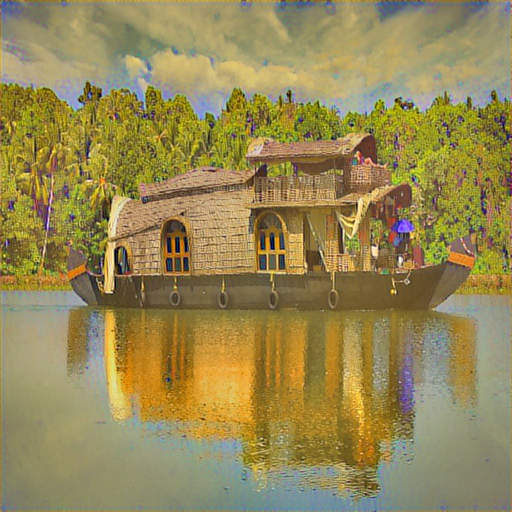

In [93]:
#Displaying the output
x = x.reshape((height, width, 3))
x = x[:, :, ::-1]
x[:, :, 0] += 103.939
x[:, :, 1] += 116.779
x[:, :, 2] += 123.68
x = np.clip(x, 0, 255).astype('uint8')

Image.fromarray(x)